# Avalanche Effect Analysis in DES

## IMPORTS

In [1]:
import random
import matplotlib.pyplot as plt
from des import Des

## UTILITY

In [2]:
def generate_random_bitstring(n=8, m=8):
    """ Generates a random bit string of n*m bits and returns a bit string list """
    return [''.join(random.choice('01') for _ in range(n)) for _ in range(m)] # Ex: ['00000001', '00000010', '000100',... '8 times']


def generate_modified_bitstrings(bsl, k, n=8, m=8):
    """ Modifies given bit string such that hamming distance between them is equal to [1, 2, ...till k]
        bsl : List of bit string format  # Ex: ['00000001', '00000010', ...'8 times']
        k :   Desired hamming distance modification [1 to k]
    Returns each modded plain or cypher text in a list """

    indices = random.sample(range(0, n*m-1), k)  # Generates k unique numbers (indices) between 0 and 63 (incl)
    indices_2D = [(i // n, i % m) for i in indices]  # Convert these indices to 2D format
    bll = [list(bs) for bs in bsl]  # List of bits string --to--> list of list of bits  # Ex: [['0','0','0','0','0','0','0','1'], ...'8 times']

    modded_bsll = []  # List of list of bit strings modified for all i: 1 to k distances
    for i, j in indices_2D:
        bll[i][j] = str(int(bll[i][j]) ^ 1)  # Flip the bit (XOR)
        modded_bsll.append([''.join(bl) for bl in bll])

    return modded_bsll  # Ex: [['00000001', '00000010', ...'8 times'], [... 8x], [... 8x], ...k times]


def convert_bitlist2bytestring(bsl):
    """ Converts bit string list to correct format of hex byte string expected by DES """
    int_list = [int(bs, 2) for bs in bsl]  # Ex: ['00000001', '00000010', '000100',... '8 times'] --to--> [1, 2, 4,... 8 times]
    return bytes(int_list)  # Ex: b'\x01\x02\x04....8 times'


def convert_bytestring2bitlist(bys):
    """ Converts byte string to list of bit strings for better visuals """
    int_list = list(bys)  # Ex: b'\x01\x02\x04....8 times' --to--> [1, 2, 4,... 8 times]
    return [format(int, '08b') for int in int_list]  # Ex: ['00000001', '00000010', '000100',... '8 times']


def get_hamming_distance(bsl1, bsl2):
    """ Returns hamming distance between two bit strings (list) """
    return sum([1 if b1 != b2 else 0 for bs1, bs2 in zip(bsl1, bsl2) for b1, b2 in zip(bs1, bs2)])


def plot_boxplot(delta_list):
    plt.figure(figsize =(10, 7))
    plt.boxplot(delta_list)
    plt.xlabel('Round -->')
    plt.ylabel('Delta-C [HD] -->')
    plt.xticks(range(1, len(delta_list)+1), range(0, len(delta_list))) # Offset labels by -1
    plt.title('Box plot of Delta-C VS Rounds')
    plt.show()

## TESTS

### TEST-1

In [3]:
def test_1(k=5):
    """ Test-1: To observe delta C, for final round, for k different distances in plain text (delta P)
        k :  k Plain texts generated for 1 plain text at [0 to k] hamming distances
    """
    print('-'*20,'TEST-1: Observe delta C for k different delta P for final round','-'*20,'\n')

    plain_text = generate_random_bitstring()  # Generate a plain text (64 bit)
    key = generate_random_bitstring()  # Generate a key (64 bit)
    mod_plain_texts = generate_modified_bitstrings(plain_text, k)  # Generate modded plain texts for each k: 1 to k

    # Output
    print('Plain Text:', plain_text)
    print('Key:', key)
    print('Delta Plain Texts:')
    [print(f'Delta={i+1}, PT={mpt}') for i, mpt in enumerate(mod_plain_texts)]
    print()

    plain_text = convert_bitlist2bytestring(plain_text)  # Convert to correct format (hex byte string)
    key = convert_bitlist2bytestring(key)  # Convert to correct format
    mod_plain_texts = [convert_bitlist2bytestring(mpt) for mpt in mod_plain_texts]  # Convert to correct format

    # Output
    print('Plain Text (bytes):', plain_text)
    print('Key (bytes):', key)
    print('Delta Plain Texts (bytes):')
    [print(f'Delta={i+1}, PT={mpt}') for i, mpt in enumerate(mod_plain_texts)]
    print()

    des = Des(key)  # Defaulted params: (key, ECB, IVs[Don't care for ECB], pad=None, pad_mode=PAD_NORMAL])
    cypher_text, ct_rounds = des.encrypt(plain_text)  # Encrypt the plain text
    mod_cyphers = [des.encrypt(mpt) for mpt in mod_plain_texts]  # Encrypt all the different delta plain texts
    mod_cypher_texts, mod_ct_rounds = zip(*mod_cyphers) #  Original code was modded to return final output and all rounds output

    # Output
    print('Cyper Text (bytes):', cypher_text)
    print('Delta Cyper Texts (bytes):')
    [print(f'PT-Delta={i+1}, CT={mct}') for i, mct in enumerate(mod_cypher_texts)]
    print()

    cypher_text = convert_bytestring2bitlist(cypher_text)  # Convert back
    mod_cypher_texts = [convert_bytestring2bitlist(mct) for mct in mod_cypher_texts]  # Convert back

    # Output
    print('Cyper Text (bits):', cypher_text)
    print('Delta Cyper Texts (bits):')
    [print(f'PT-Delta={i+1}, CT={mct}') for i, mct in enumerate(mod_cypher_texts)]
    print()

    delta_c_list = [get_hamming_distance(cypher_text, mct) for mct in mod_cypher_texts]  # Calc HD between CT and Delta CTs

    # Output
    print('Delta-PT VS Delta-CT:')
    [print(f'PT-Delta={i + 1}, CT-Delta={dc}') for i, dc in enumerate(delta_c_list)]
    print()

In [4]:
test_1(k=5)

-------------------- TEST-1: Observe delta C for k different delta P for final round -------------------- 

Plain Text: ['11110011', '11111100', '11011011', '11110010', '00010010', '11100110', '10011110', '01000000']
Key: ['10010000', '11101011', '00000001', '00000001', '01100010', '00011010', '01100100', '01011001']
Delta Plain Texts:
Delta=1, PT=['11110011', '11111101', '11011011', '11110010', '00010010', '11100110', '10011110', '01000000']
Delta=2, PT=['11110011', '11111101', '11011011', '11110010', '00010010', '11100110', '10111110', '01000000']
Delta=3, PT=['11110011', '11111101', '11011011', '11110010', '01010010', '11100110', '10111110', '01000000']
Delta=4, PT=['11110011', '11111101', '11011011', '11110010', '01010000', '11100110', '10111110', '01000000']
Delta=5, PT=['11110011', '11111101', '11011011', '11100010', '01010000', '11100110', '10111110', '01000000']

Plain Text (bytes): b'\xf3\xfc\xdb\xf2\x12\xe6\x9e@'
Key (bytes): b'\x90\xeb\x01\x01b\x1adY'
Delta Plain Texts (byte

### TEST-2

In [5]:
def test_2(k=5):
    """ Test-2: To observe delta C, for final round, for k different distances in keys (delta K)
        k :  k Keys generated for 1 Key at [0 to k] hamming distances
    """
    print('-' * 5, 'TEST-2: Observe delta C for k different delta K for final round', '-' * 5, '\n')

    plain_text = generate_random_bitstring()  # Generate a plain text (64 bit)
    key = generate_random_bitstring()  # Generate a key (64 bit)
    mod_keys = generate_modified_bitstrings(key, k)  # Generate modded key for each k: 1 to k

    plain_text = convert_bitlist2bytestring(plain_text)  # Convert to correct format (hex byte string)
    key = convert_bitlist2bytestring(key)  # Convert to correct format
    mod_keys = [convert_bitlist2bytestring(mk) for mk in mod_keys]  # Convert to correct format

    des = Des(key)  # Defaulted params: (key, ECB, IVs[Don't care for ECB], pad=None, pad_mode=PAD_NORMAL])
    mod_deses = [Des(mk) for mk in mod_keys]  # Instantiate DES for each key
    cypher_text, ct_rounds = des.encrypt(plain_text)  # Encrypt the plain text with vanilla key
    mod_cyphers = [md.encrypt(plain_text) for md in mod_deses]  # Encrypt plain text with all the different keys
    mod_cypher_texts, mod_ct_rounds = zip(*mod_cyphers)  # Original code was modded to return final output and all rounds output

    cypher_text = convert_bytestring2bitlist(cypher_text)  # Convert back
    mod_cypher_texts = [convert_bytestring2bitlist(mct) for mct in mod_cypher_texts]  # Convert back

    delta_c_list = [get_hamming_distance(cypher_text, mct) for mct in mod_cypher_texts]  # Calc HD between CT and Delta CTs

    # Output
    print('Delta-K VS Delta-CT:')
    [print(f'K-Delta={i + 1}, CT-Delta={dc}') for i, dc in enumerate(delta_c_list)]
    print()

In [6]:
test_2(k=5)

----- TEST-2: Observe delta C for k different delta K for final round ----- 

Delta-K VS Delta-CT:
K-Delta=1, CT-Delta=32
K-Delta=2, CT-Delta=30
K-Delta=3, CT-Delta=30
K-Delta=4, CT-Delta=30
K-Delta=5, CT-Delta=32



## ASSIGNMENT EXPERIMENTS (ANALYSIS)

### (i) EXPERIMENT-1

In [7]:
def experiment_1(k=5):
    """ Expt-1: To observe delta C, for k different plain text (delta P), for each round and plot Box-plot for delta C VS rounds
        k :  k Random plain texts generated
    """
    print('EXPERIMENT-1: Observe delta C for k different plain text (delta P),',
          'for each round and plot Box-plot for delta-C VS Rounds\n')
    # Note: Delta C is calculated with respect to a fixed reference C text instead of all pairs=k*(k-1)
    #       Which is useful in experiment_2 for increasing hamming distance analysis

    plain_text = generate_random_bitstring()  # Generate a plain text for reference C
    key = generate_random_bitstring()  # Generate a key (64 bit)
    plain_ktexts = [generate_random_bitstring() for _ in range(k)]  # Generate k random plain texts

    plain_text = convert_bitlist2bytestring(plain_text)  # Convert to correct format (hex byte string)
    key = convert_bitlist2bytestring(key)  # Convert to correct format
    plain_ktexts = [convert_bitlist2bytestring(pt) for pt in plain_ktexts]  # Convert to correct format

    des = Des(key)  # Defaulted params: (key, ECB, IVs[Don't care for ECB], pad=None, pad_mode=PAD_NORMAL])
    _, ct_rounds = des.encrypt(plain_text)  # Encrypt the plain text
    cyphers = [des.encrypt(mpt) for mpt in plain_ktexts]  # Encrypt all the different plain texts
    _, ckts_rounds = zip(*cyphers)  # Original code was modded to return final output and all rounds output

    ct_rounds = [convert_bytestring2bitlist(ctr) for ctr in ct_rounds]  # Convert back
    ckts_rounds = [[convert_bytestring2bitlist(ctr) for ctr in cktsr] for cktsr in ckts_rounds]  # Convert back

    # Get HD for each cypher text k[i] for each round, with respect to a single C for that round
    delta_ckts_rounds = [[get_hamming_distance(ct, cktsr[i]) for cktsr in ckts_rounds] for i, ct in enumerate(ct_rounds)]

    
    # Outputs and plots
    print('Rows->Rounds, Column->k')
    [print(dcr) for dcr in delta_ckts_rounds]
    plot_boxplot(delta_ckts_rounds)

EXPERIMENT-1: Observe delta C for k different plain text (delta P), for each round and plot Box-plot for delta-C VS Rounds

Rows->Rounds, Column->k
[31, 32, 36, 30, 33]
[28, 33, 39, 29, 32]
[27, 34, 37, 35, 35]
[25, 31, 34, 32, 35]
[30, 25, 37, 24, 31]
[38, 30, 37, 27, 34]
[37, 34, 37, 34, 35]
[31, 30, 31, 36, 35]
[30, 30, 25, 28, 31]
[33, 32, 32, 29, 27]
[29, 30, 36, 42, 31]
[30, 34, 30, 40, 34]
[30, 40, 29, 33, 34]
[29, 37, 32, 33, 35]
[32, 33, 30, 31, 34]
[36, 33, 31, 35, 36]
[41, 34, 33, 37, 31]


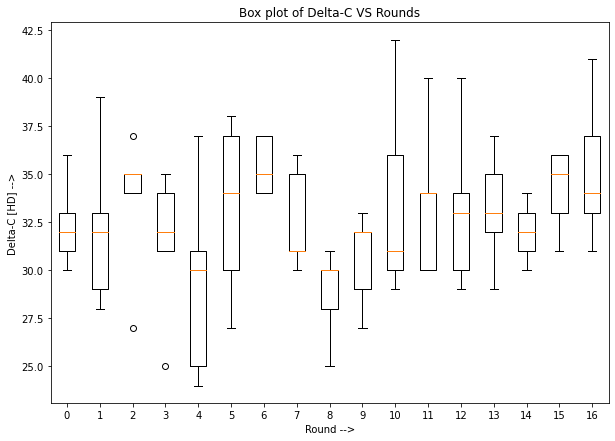

In [8]:
experiment_1(k=5)

### (ii) EXPERIMENT-2

In [9]:
def experiment_2(k=5):
    """ Expt-2: To observe delta C, for each round, for k different distances in plain text (delta P)
        k :  k Plain texts generated for 1 plain text at [0 to k] hamming distances
    """
    print('EXPERIMENT-2: Observe delta C for k different PT with increasing HD',
    'for each round and plot Box-plot for delta-C VS Rounds','\n')
    # Note: Delta C is calculated with respect to a fixed reference C for that round, useful for HD analysis

    plain_text = generate_random_bitstring()  # Generate a plain text (64 bit)
    key = generate_random_bitstring()  # Generate a key (64 bit)
    mod_plain_texts = generate_modified_bitstrings(plain_text, k)  # Generate modded plain texts with k HD for each k: 1 to k

    plain_text = convert_bitlist2bytestring(plain_text)  # Convert to correct format (hex byte string)
    key = convert_bitlist2bytestring(key)  # Convert to correct format
    mod_plain_texts = [convert_bitlist2bytestring(pt) for pt in mod_plain_texts]  # Convert to correct format

    des = Des(key)  # Defaulted params: (key, ECB, IVs[Don't care for ECB], pad=None, pad_mode=PAD_NORMAL])
    _, ct_rounds = des.encrypt(plain_text)  # Encrypt the plain text
    cyphers = [des.encrypt(mpt) for mpt in mod_plain_texts]  # Encrypt all the different plain texts
    _, ckts_rounds = zip(*cyphers)  # Original code was modded to return final output and all rounds output

    ct_rounds = [convert_bytestring2bitlist(ctr) for ctr in ct_rounds]  # Convert back
    ckts_rounds = [[convert_bytestring2bitlist(ctr) for ctr in cktsr] for cktsr in ckts_rounds]  # Convert back

    # Get HD for each cypher text k[i] for each round, with respect to a single C for that round
    delta_ckts_rounds = [[get_hamming_distance(ct, cktsr[i]) for cktsr in ckts_rounds] for i, ct in enumerate(ct_rounds)]


    # Outputs and plots
    print('Rows->Rounds, Column->k')
    [print(dcr) for dcr in delta_ckts_rounds]
    plot_boxplot(delta_ckts_rounds)

EXPERIMENT-2: Observe delta C for k different PT with increasing HD for each round and plot Box-plot for delta-C VS Rounds 

Rows->Rounds, Column->k
[1, 2, 3, 4, 5]
[1, 4, 9, 10, 11]
[4, 11, 22, 27, 28]
[14, 23, 29, 36, 37]
[24, 32, 33, 35, 37]
[31, 34, 36, 33, 39]
[39, 26, 32, 30, 35]
[38, 26, 34, 32, 34]
[39, 31, 37, 34, 36]
[34, 32, 37, 31, 33]
[27, 37, 39, 30, 29]
[31, 37, 36, 31, 31]
[34, 37, 36, 31, 27]
[32, 33, 32, 30, 28]
[29, 27, 31, 31, 36]
[30, 30, 37, 33, 32]
[34, 34, 34, 28, 33]


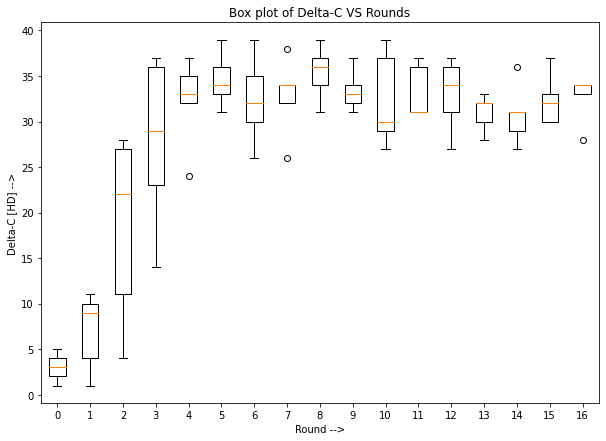

In [10]:
experiment_2(k=5)

### (iii) EXPERIMENT-3

In [11]:
def experiment_3(k=5):
    """ Expt-3: To observe delta C, for each round, for k different distances in keys (delta K)
        k :  k Keys generated for 1 Key at [0 to k] hamming distances
    """
    print('EXPERIMENT-3: Observe delta C for k different keys for each round',
        'and plot Box-plot for delta-C VS Rounds','\n')
    # Note: Due to better results of expt_2, the k different keys taken in this experiment are
    #       also in increasing order of hamming distance

    plain_text = generate_random_bitstring()  # Generate a plain text (64 bit)
    key = generate_random_bitstring()  # Generate a key (64 bit)
    mod_keys = generate_modified_bitstrings(key, k)  # Generate modded key with k HD for each k: 1 to k

    plain_text = convert_bitlist2bytestring(plain_text)  # Convert to correct format (hex byte string)
    key = convert_bitlist2bytestring(key)  # Convert to correct format
    mod_keys = [convert_bitlist2bytestring(mk) for mk in mod_keys]  # Convert to correct format

    des = Des(key)  # Defaulted params: (key, ECB, IVs[Don't care for ECB], pad=None, pad_mode=PAD_NORMAL])
    mod_deses = [Des(mk) for mk in mod_keys]  # Instantiate DES for each key
    _, ct_rounds = des.encrypt(plain_text)  # Encrypt the plain text with vanilla key
    mod_cyphers = [md.encrypt(plain_text) for md in mod_deses]  # Encrypt plain text with all the different keys
    _, ckts_rounds = zip(*mod_cyphers)  # Original code was modded to return final output and all rounds output

    ct_rounds = [convert_bytestring2bitlist(ctr) for ctr in ct_rounds]  # Convert back
    ckts_rounds = [[convert_bytestring2bitlist(ctr) for ctr in cktsr] for cktsr in ckts_rounds]  # Convert back

    # Get HD for each cypher text k[i] for each round, with respect to a single C for that round
    delta_ckts_rounds = [[get_hamming_distance(ct, cktsr[i]) for cktsr in ckts_rounds] for i, ct in enumerate(ct_rounds)]


    # Outputs and plots
    print('Rows->Rounds, Column->k')
    [print(dcr) for dcr in delta_ckts_rounds]
    plot_boxplot(delta_ckts_rounds)

EXPERIMENT-3: Observe delta C for k different keys for each round and plot Box-plot for delta-C VS Rounds 

Rows->Rounds, Column->k
[0, 0, 0, 0, 0]
[2, 4, 4, 6, 9]
[12, 20, 23, 24, 26]
[27, 31, 35, 34, 30]
[31, 29, 25, 34, 30]
[31, 29, 28, 39, 28]
[35, 32, 29, 38, 29]
[37, 32, 29, 31, 32]
[38, 32, 39, 28, 28]
[35, 31, 36, 29, 34]
[36, 33, 31, 32, 33]
[38, 33, 29, 29, 22]
[30, 31, 30, 25, 23]
[25, 35, 33, 27, 34]
[29, 33, 31, 27, 31]
[29, 34, 28, 32, 21]
[35, 37, 31, 33, 22]


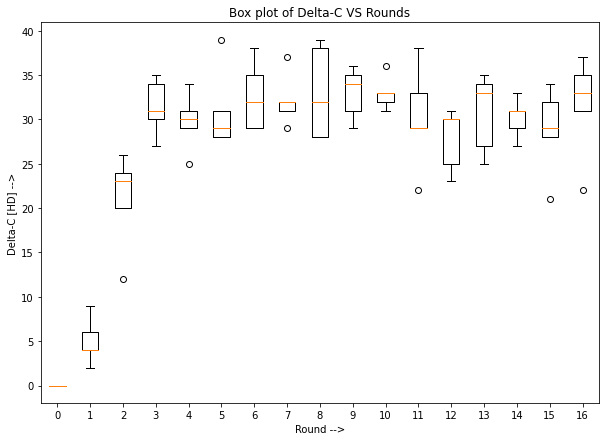

In [12]:
experiment_3(k=5)